# RFM analysis

### Load Data 

In [57]:
fdata.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


In [59]:
fdata["InvoiceDate"].max() 
# getting maximum date for finding recent date of purchase to calculate recency value 


Timestamp('2011-12-09 12:50:00')

In [60]:
fdata["InvoiceDate"].min()
# getting minimum date for finding starting date of purchase to calculate recency value 

Timestamp('2010-12-01 08:26:00')

In [62]:
fdata.shape

(392732, 7)

In [63]:
fdata["InvoiceDate"].value_counts()

2011-11-14 15:27:00    542
2011-11-28 15:54:00    533
2011-12-05 17:17:00    529
2011-11-23 13:39:00    443
2011-10-31 14:09:00    435
                      ... 
2011-09-27 09:46:00      1
2011-11-17 12:19:00      1
2011-01-21 14:51:00      1
2011-08-26 14:20:00      1
2011-05-06 11:51:00      1
Name: InvoiceDate, Length: 17286, dtype: int64

In [64]:
# import datetime
from datetime import timedelta
from datetime import datetime, timedelta
recent = (fdata["InvoiceDate"].max()) + timedelta(days=1)
print(recent)

2011-12-10 12:50:00


In [65]:
fdata.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


In [67]:
## groupy the customer to find the RFM value 
RFM = fdata.groupby(["CustomerID"]).agg ({
 "InvoiceDate": lambda x:(recent-x.max()).days , # invoice data for recency 
    "InvoiceNo" : "count", # invoice no for calculating frequency 
    "TotalPrice" : "sum" # total price for monetary 
    
})

RFM.rename(columns={"InvoiceDate": "recency","InvoiceNo":"frequency","TotalPrice":"monetary"},inplace=True)
display(RFM)

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [68]:
# creat R F M value with desire ranging
Rlabel=range(4,0,-1)
Flabel=range(1,5)
Mlabel=range(1,5)

rgroup=pd.qcut(RFM["recency"],q=4,labels=Rlabel)

fgroup=pd.qcut(RFM["frequency"],q=4,labels=Rlabel)

mgroup=pd.qcut(RFM["monetary"],q=4,labels=Rlabel)

RFM["R"] = rgroup.values
RFM["F"] = fgroup.values
RFM["M"] = mgroup.values

display(RFM.tail(15))

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
18265.0,72,46,801.51,2,2,2
18268.0,134,1,25.50,2,4,4
18269.0,366,7,168.60,1,4,4
18270.0,38,11,283.15,3,4,4
18272.0,3,166,3078.58,4,1,1
18273.0,2,3,204.00,4,4,4
18274.0,30,11,175.92,3,4,4
18276.0,44,14,335.86,3,4,3
18277.0,58,8,110.38,2,4,4


In [69]:
# comine R,F,M , 
RFM["rfm_value"]=RFM.apply(lambda x: str(x["R"]) + str(x["F"]) + str(x["M"]), axis= 1)
display(RFM.head())

,recency,frequency,monetary,R,F,M,rfm_value
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,4,1,1.04.01.0
12347.0,2,182,4310.00,4,1,1,4.01.01.0
12348.0,75,31,1797.24,2,3,1,2.03.01.0
12349.0,19,73,1757.55,3,2,1,3.02.01.0
12350.0,310,17,334.40,1,4,3,1.04.03.0


In [70]:
# creating RFM score for customer segmentation
RFM["Score"]= RFM[["R","F","M"]].sum(axis=1)
display(RFM.head())

,recency,frequency,monetary,R,F,M,rfm_value,Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,4,1,1.04.01.0,6.0
12347.0,2,182,4310.00,4,1,1,4.01.01.0,6.0
12348.0,75,31,1797.24,2,3,1,2.03.01.0,6.0
12349.0,19,73,1757.55,3,2,1,3.02.01.0,6.0
12350.0,310,17,334.40,1,4,3,1.04.03.0,8.0


In [71]:
print("max score :",RFM["Score"].max())
print("mix score :",RFM["Score"].min())

max score : 12.0
mix score : 3.0


In [72]:
# customer segmentation
def rfm_status(df):
    if(df["Score"]<=5 ):
        return "Platinum"
    elif(df["Score"]>=6) and (df["Score"]<=8):return "Gold"
    elif(df["Score"]>=9) and (df["Score"]<=12):return "Silver"

    
    else: return "requires activation"
    

In [73]:
RFM["RFM_status"]= RFM.apply(rfm_status,axis=1)
display(RFM.head(10))

,recency,frequency,monetary,R,F,M,rfm_value,Score,RFM_status
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,4,1,1.04.01.0,6.0,Gold
12347.0,2,182,4310.00,4,1,1,4.01.01.0,6.0,Gold
12348.0,75,31,1797.24,2,3,1,2.03.01.0,6.0,Gold
12349.0,19,73,1757.55,3,2,1,3.02.01.0,6.0,Gold
12350.0,310,17,334.40,1,4,3,1.04.03.0,8.0,Gold
12352.0,36,85,2506.04,3,2,1,3.02.01.0,6.0,Gold
12353.0,204,4,89.00,1,4,4,1.04.04.0,9.0,Silver
12354.0,232,58,1079.40,1,2,2,1.02.02.0,5.0,Platinum
12355.0,214,13,459.40,1,4,3,1.04.03.0,8.0,Gold


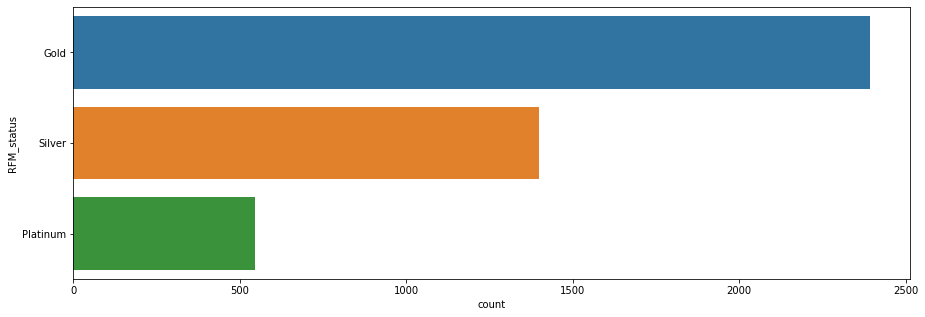

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(y="RFM_status",data=RFM)
plt.show()